In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

# Starting With Data 

In [2]:
df =pd.read_csv('/kaggle/input/houses-price/data.csv')
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# checking anything weird in the data 
columns = df.columns
for col in columns:
    print(col + ':', df[col].nunique()) # printing number of uniques 
    print(sorted(df[col].unique()), '\n')

id: 21436
[1000102, 1200019, 1200021, 2800031, 3600057, 3600072, 3800008, 5200087, 6200017, 7200080, 7200179, 7400062, 7600057, 7600065, 7600125, 7600136, 9000025, 11200070, 11200290, 11200400, 11300120, 11500240, 11500890, 11501160, 11501310, 11501330, 11510310, 11510700, 11520030, 11520200, 11520370, 11520640, 11900140, 13001215, 13001795, 13001991, 13002460, 13002495, 16000015, 16000200, 16000397, 16000435, 16000545, 23500180, 23500190, 23500220, 23520190, 23520380, 31000165, 31200020, 34000005, 34001160, 34001304, 34001540, 34001765, 37000335, 37000435, 40000228, 40000235, 40000362, 40000471, 40000553, 40000669, 40001065, 41000454, 42000006, 42000065, 42000127, 42000130, 42000245, 46100204, 46100350, 46100504, 49000051, 49500090, 50300090, 50300220, 52000067, 53500020, 53500450, 53500760, 56000095, 59000201, 59000250, 59000445, 59500050, 65000085, 65000210, 65000260, 65000400, 66000070, 66000140, 66000265, 84000105, 84000245, 84000335, 87000006, 87000213, 87000245, 87000283, 880001

In [5]:
# unusual observation 
df[df['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


values of sqft_living and sqft_lot is less than what it should have been , there must be some error in data

# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['bathrooms']=df['bathrooms'].round()
df['bathrooms'] = df['bathrooms'].astype('int64')

df['floors']=df['floors'].round()
df['floors'] = df['floors'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
print(df['bathrooms'].unique())
print(df['floors'].unique())

[1 2 3 4 5 0 6 7 8]
[1 2 3 4]


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.058715,2079.899736,1.510697e+04,1.534956,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.755524,918.440897,4.142051e+04,0.554742,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [10]:
# checking sum of nulls in data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# checking duplicates in data 
df.duplicated().sum()

0

In [12]:
# Date of the selling home , I changed it to the date's normal format and removed month , day because it doesn't matter , I thnik only year matters
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

df = df.drop("date",axis=1)
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
6,1321400060,257500.0,3,2,1715,6819,2,0,0,3,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014
7,2008000270,291850.0,3,2,1060,9711,1,0,0,3,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015
8,2414600126,229500.0,3,1,1780,7470,1,0,0,3,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015
9,3793500160,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  int64  
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  int64  
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Exploratory Data Analysis

<AxesSubplot:xlabel='price'>

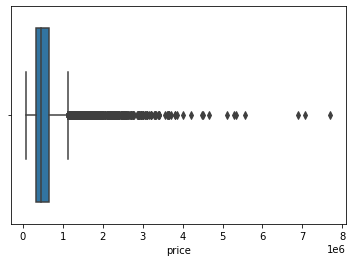

In [14]:
# see how much our target varies
sns.boxplot(x=df['price'])

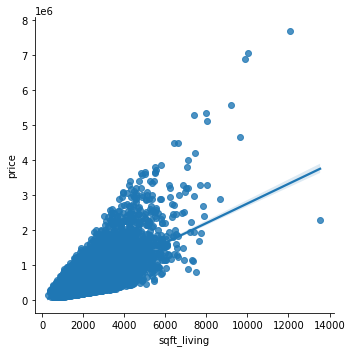

In [15]:
sns.lmplot(x='sqft_living',y='price',data=df)

we can observe a quite good correlation between the square footage and the target

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

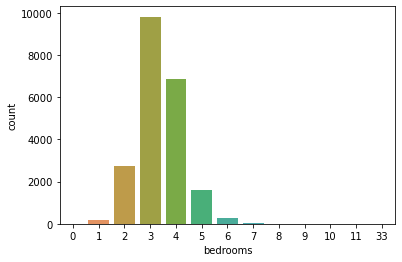

In [16]:
sns.countplot(x='bedrooms',data=df)

apartments with 3 bedrooms are most popular

In [17]:
import plotly.express as ex
ex.pie(df,names='bedrooms',title='bedrooms distribution',hole=0.20)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

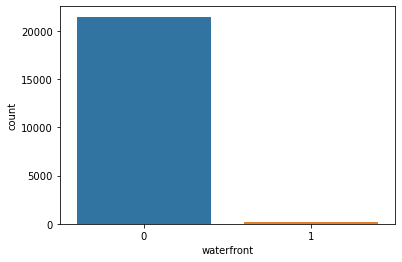

In [18]:
sns.countplot(x='waterfront',data=df)

In [19]:
import plotly.express as ex
ex.pie(df,names='waterfront',title='houses that either have waterfront or not',hole=0.20)

waterfront apartments are rare

let's see does it affects the price or not

<AxesSubplot:xlabel='floors', ylabel='count'>

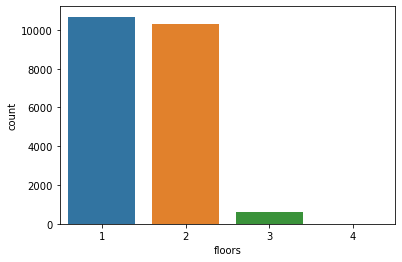

In [20]:
sns.countplot(x='floors',data=df)

In [21]:
import plotly.express as ex
ex.pie(df,names='floors',title='floors from 1-4',hole=0.20)

<AxesSubplot:xlabel='condition', ylabel='count'>

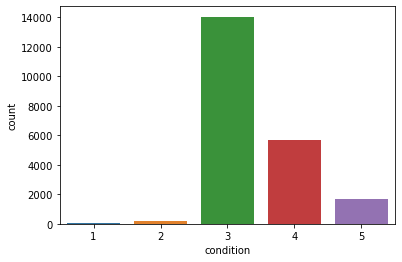

In [22]:
sns.countplot(x='condition',data=df)

In [23]:
import plotly.express as ex
ex.pie(df,names='condition',title='condition of hourses from 1-5',hole=0.20)

condition is an index from 1 to 5 on the condition of the apartment , so most houses are on average neither bad nor too good 

let's see also how it affects the price

<AxesSubplot:xlabel='condition', ylabel='price'>

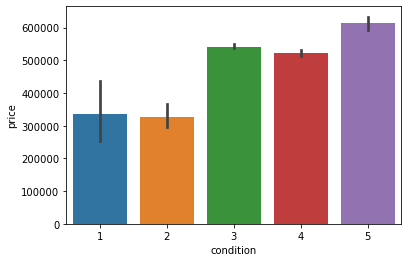

In [24]:
sns.barplot(x='condition',y='price',data=df)

as expected , the better the condition of the house the more expensive its price

<AxesSubplot:xlabel='grade', ylabel='count'>

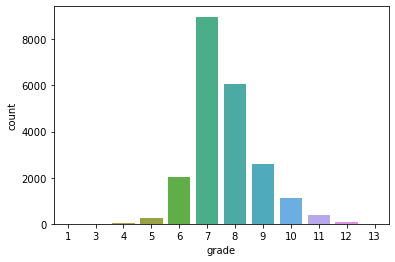

In [25]:
sns.countplot(x='grade',data=df)

grade shows building construction , also all houses are on the average

In [26]:
import plotly.express as ex
ex.pie(df,names='grade',title='construction of house from 1-13',hole=0.20)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



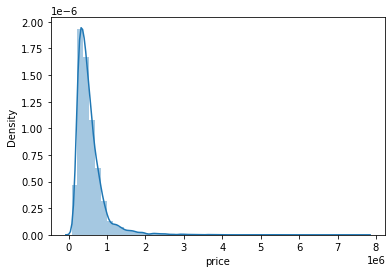

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



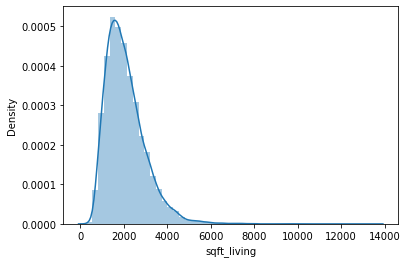

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



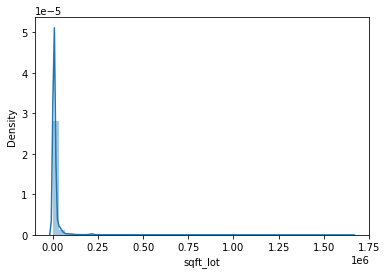

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



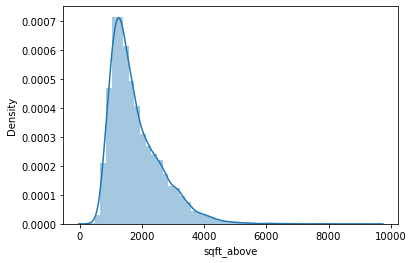

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



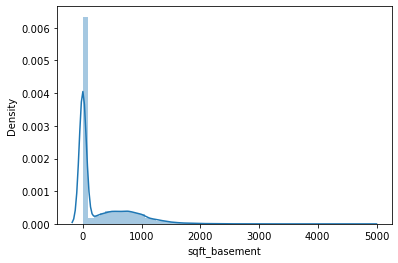

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



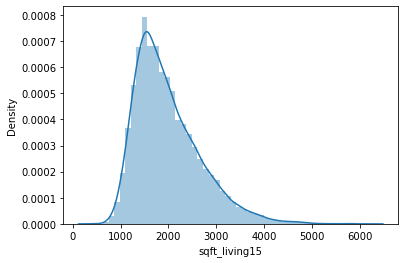

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



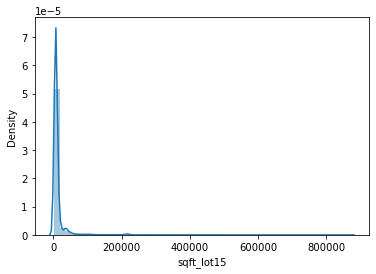

In [27]:
# Let's check distribution of those columns
num_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in num_cols:
    sns.distplot(df[col], kde = True)
    plt.show()

### Data is almost right skewed , let's fix this by using log transformation which is used to transform skewed data to approximately conform to normality

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



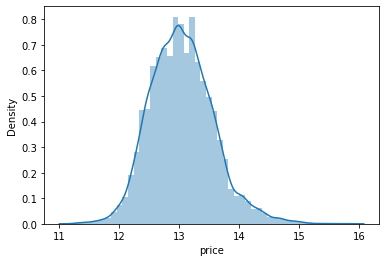

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



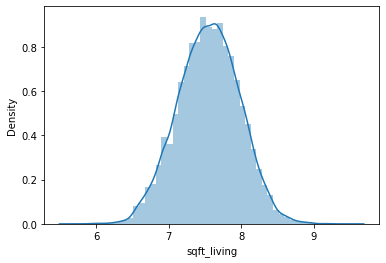

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



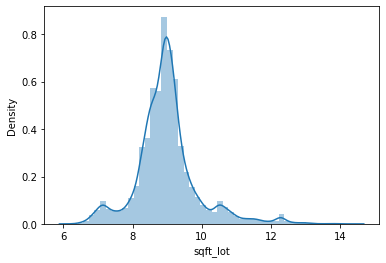

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



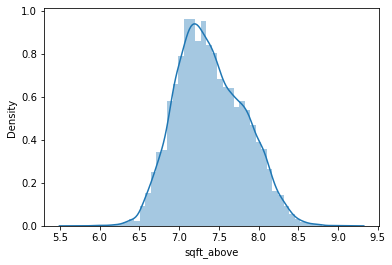

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



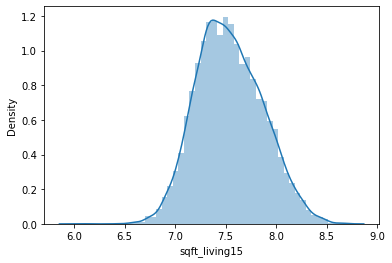

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



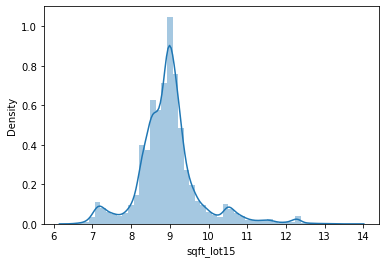

In [28]:
num_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
for col in num_cols:
    sns.distplot(np.log(df[col]), kde = True)  
    plt.show()

In [29]:
num_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
for col in num_cols:
    df[col] = np.log(df[col])

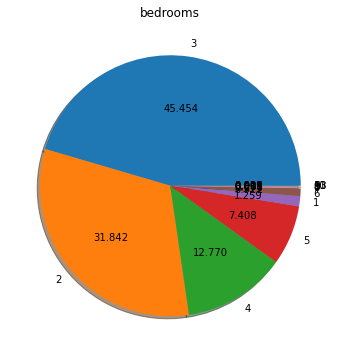

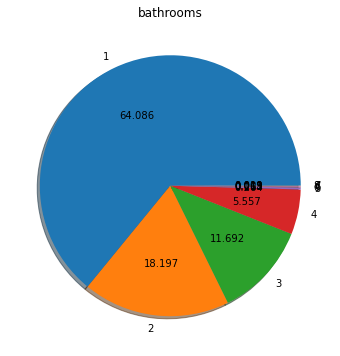

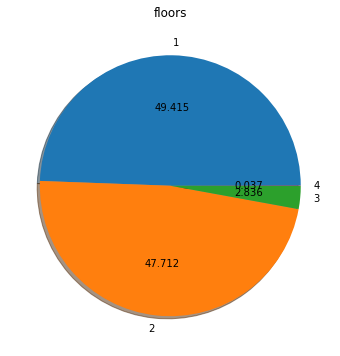

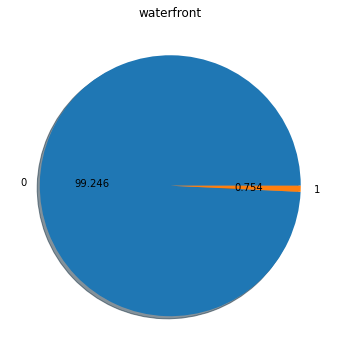

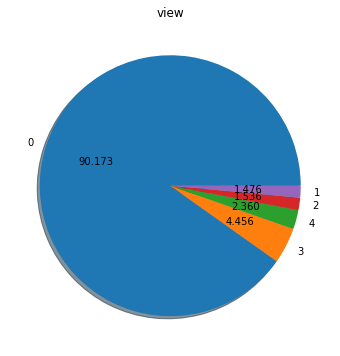

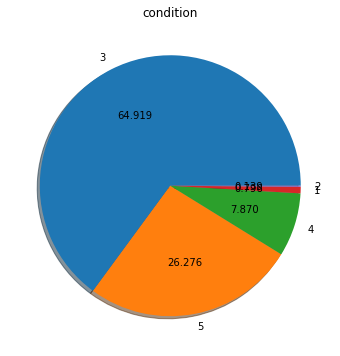

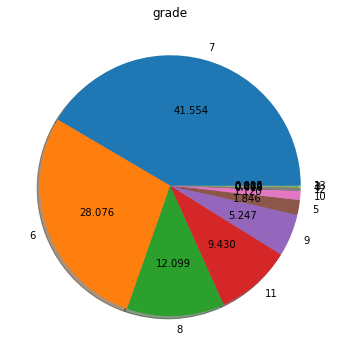

In [30]:
# observed some outliers in these columns which we can't fix using log transformation so let's try to fix them manually
cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
for col in cols:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=True,
            autopct='%.3f')
    plt.show()

In [31]:
cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
for col in cols:
    print(col + ':')
    print(df[col].value_counts())
    print() 

bedrooms:
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

bathrooms:
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64

floors:
1    10680
2    10312
3      613
4        8
Name: floors, dtype: int64

waterfront:
0    21450
1      163
Name: waterfront, dtype: int64

view:
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

condition:
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

grade:
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64



#### let's look at bedrooms column, > 7 bedrooms seems outliers 
#### so we can replace them all with 7 as it's the maximum normal number
* 
#### will do this way to all of the above columns 

In [32]:
# By some search , we can do the above idea by using dictionary 

In [33]:
dictt = {'bedrooms': 7, 'bathrooms': 6, 'floors':3, 'grade':12}
bedrooms_replace = [8, 9, 10, 11, 33]
bathrooms_replace = [7, 8]
floors_replace = [4]
grade_replace = [13]

dictt_replace = {'bedrooms': bedrooms_replace, 'bathrooms': bathrooms_replace, 'floors':floors_replace, 'grade':grade_replace}

for col in dictt.keys():
    df[col] = df[col].replace(dictt_replace[col], dictt[col])

In [34]:
# checking the changes 
cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
for col in cols:
    print(col + ':')
    print(df[col].value_counts())
    print() 

bedrooms:
3    9824
4    6882
2    2760
5    1601
6     272
1     199
7      62
0      13
Name: bedrooms, dtype: int64

bathrooms:
2    13851
1     3933
3     2527
4     1201
5       57
6       30
0       14
Name: bathrooms, dtype: int64

floors:
1    10680
2    10312
3      621
Name: floors, dtype: int64

waterfront:
0    21450
1      163
Name: waterfront, dtype: int64

view:
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

condition:
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

grade:
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12     103
4       29
3        3
1        1
Name: grade, dtype: int64



In [35]:
# the year in which the house is renovated doesn't matter , only what matter is that is the house have been renovated before or not ?
# so we will change them into 0's and 1's where 0 indicates that house haven't been renovated before and 1 indicates that the house has been renovated before

df['yr_renovated']=df['yr_renovated'].apply(lambda x:1 if x>0 else 0)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

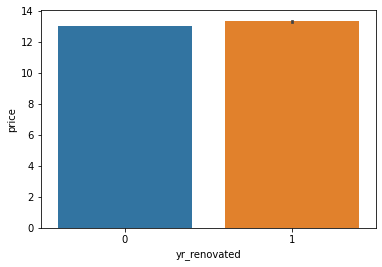

In [36]:
sns.barplot(x='yr_renovated',y='price',data=df)

### want a better price ? get your house renovated

In [37]:
# also here the size of the basement doesn't really matter as the house has basement or not
# 1 indicates that the house has basement but 0 not

df['sqft_basement']=df['sqft_basement'].apply(lambda x:1 if x>0 else 0)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

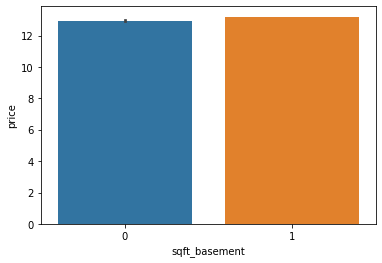

In [38]:
sns.barplot(x='sqft_basement',y='price',data=df)

### we need to know is the existence of basements can affect price or not , and it seems yes it affects price by around 1000000

<AxesSubplot:>

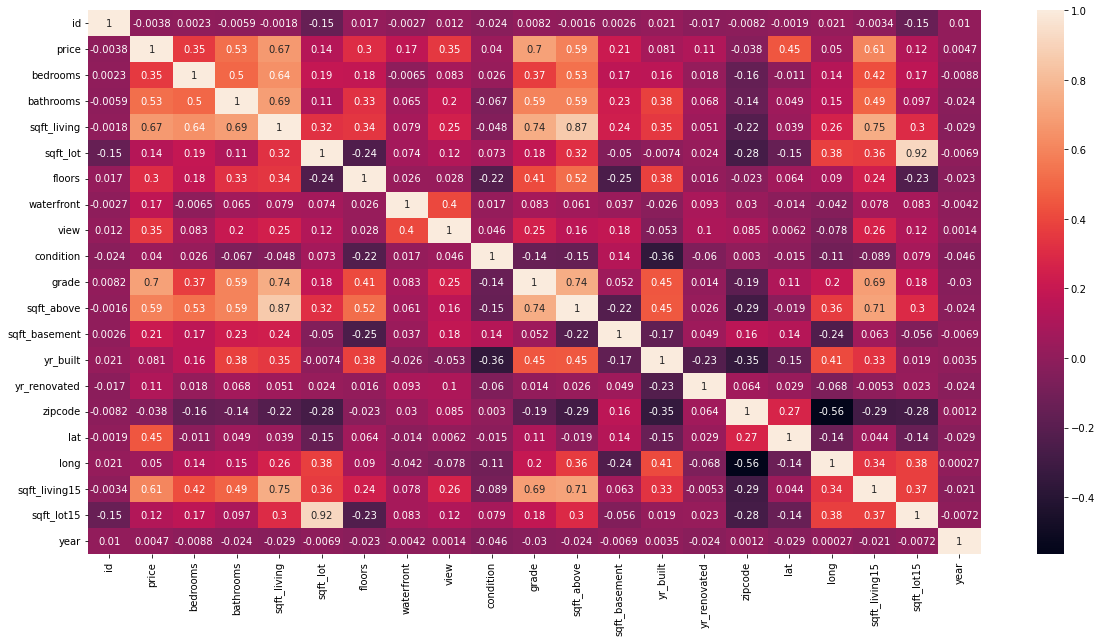

In [39]:
#correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
# won't be used 
removed_cols = ['id', 'year', 'yr_built','waterfront'] 
df.drop(removed_cols, axis = 1, inplace = True)

# Modeling

In [41]:
X=df.drop('price',axis=1)
y=df['price']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)

In [43]:
# Standard Scaler
std_scale = StandardScaler()

X_train = std_scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = std_scale.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04,1.945100e+04
mean,-1.260281e-16,-2.847504e-16,-9.413751e-16,1.057905e-15,-3.360749e-17,-5.844781e-17,2.969879e-16,-1.709598e-16,-1.660648e-15,-9.570829e-17,-3.433809e-17,-6.123696e-14,8.191826e-15,-7.082121e-14,7.685887e-16,1.718731e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-3.745238e+00,-2.734510e+00,-3.849899e+00,-3.040197e+00,-9.648091e-01,-3.054781e-01,-3.697866e+00,-3.984273e+00,-3.467841e+00,-8.008961e-01,-2.109911e-01,-1.441159e+00,-2.918562e+00,-2.169245e+00,-4.732560e+00,-3.048106e+00
25%,-4.053454e-01,-7.479632e-02,-6.834166e-01,-5.152935e-01,-9.648091e-01,-3.054781e-01,-6.311315e-01,-5.589428e-01,-7.309779e-01,-8.008961e-01,-2.109911e-01,-8.426725e-01,-6.445065e-01,-8.112988e-01,-7.095337e-01,-5.226131e-01
50%,-4.053454e-01,-7.479632e-02,1.454299e-02,-5.665030e-02,8.431390e-01,-3.054781e-01,-6.311315e-01,-5.589428e-01,-9.670774e-02,-8.008961e-01,-2.109911e-01,-2.441861e-01,8.533016e-02,-1.145515e-01,-6.530522e-02,-2.704071e-02
75%,7.079522e-01,-7.479632e-02,6.949474e-01,3.214869e-01,8.431390e-01,-3.054781e-01,9.022358e-01,2.973896e-01,7.193027e-01,1.248601e+00,-2.109911e-01,7.470571e-01,8.520199e-01,6.319634e-01,6.946660e-01,3.196038e-01
max,4.047845e+00,5.244630e+00,4.625783e+00,5.535244e+00,2.651087e+00,4.937720e+00,2.435603e+00,3.722720e+00,4.113495e+00,1.248601e+00,4.739537e+00,2.261976e+00,1.573908e+00,6.390793e+00,3.648797e+00,5.821913e+00


# Applying Linear Regression Model

In [44]:
regressorp=LinearRegression()
regressorp.fit(X_train, y_train)

train_acc = regressorp.score(X_train, y_train)
test_acc = regressorp.score(X_test, y_test)

print("Train Acc: ", train_acc)
print(f"Test Acc: {test_acc}")

Train Acc:  0.7514400487676505
Test Acc: 0.7702223133871694


#### Seems that the model is underfitting ( test > train ) , so let's increase ploynomial degree by using polynomial regression 

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


poly_reg= PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

regressorp=LinearRegression()
regressorp.fit(X_poly,y_train)

train_acc = regressorp.score(X_poly, y_train)
test_acc = regressorp.score(X_test_poly, y_test)

print("Train Acc: ", train_acc)
print(f"Test Acc: {test_acc}")
print("r2 score : ",r2_score(regressorp.predict(X_poly), y_train))
print("r2 score : ",r2_score(regressorp.predict(X_test_poly), y_test))

Train Acc:  0.8756320473220413
Test Acc: 0.8710148240359127
r2 score :  0.8579791305935383
r2 score :  0.8569046378088436


# Now let's classify data according to price into two groups , group 0 and group 1 

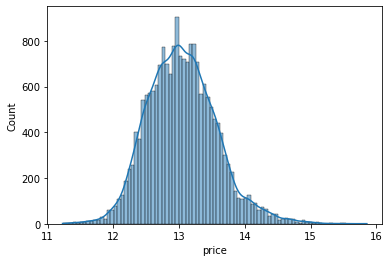

In [46]:
sns.histplot(y_train, kde=True)
plt.show()

In [47]:
dist_point = 12

In [48]:
y_train = y_train.apply(lambda x:1 if x>dist_point else 0)
y_test = y_test.apply(lambda x:1 if x>dist_point else 0)


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score


def classification_result(y_test, y_pred):
    print('Test Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    clf_report = classification_report(y_test, y_pred, target_names=['Low_Price','High_Price'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()

Test Accuracy: 98.56614246068455
Recall: 0.999529854254819
Precision: 0.9860853432282004

 confussion matrix:
 [[   5   30]
 [   1 2126]]


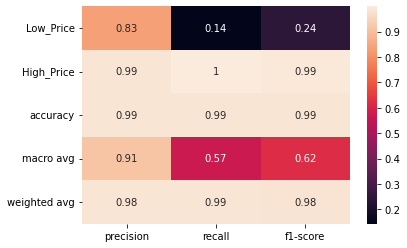

In [50]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = lr_classifier.predict(X_test)
classification_result(y_test, y_pred)

Test Accuracy: 98.67359004678423
Recall: 0.9990621092121718
Precision: 0.9876377871639024

 confussion matrix:
 [[   19   240]
 [   18 19174]]


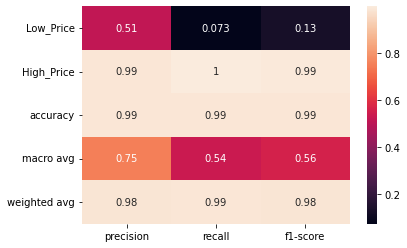

In [51]:
# Train
y_pred = lr_classifier.predict(X_train)
classification_result(y_train, y_pred)